# Multi-Armed Bandit Line Walk

In this notebook, we test our knowledge of multi-armed bandits on the a line wark problem. Th
e formulation of a line walk problem is as follows:
- We have a line scaled from 0 to $\texttt{max\_scale}$.
- We set sample random two variables $\texttt{agent\_position}$ and $\texttt{goal}$ in the line scale. These are:
    - $\texttt{agent\_position}$: our agent position
    - $\texttt{goal}$: our goal position
- We can perfom n set actions action which basically determines how the agent towards to the goal.
- Objective: Find the set of actions to makes the agent reach the goal.
- Can your agent find the least number of steps?


Note: This is a search problem and this can easily be solved used binary search.

### Import

In [30]:
import numpy as np
import matplotlib.pyplot as plt

## Environment

We start by creating the environment which is a fairly simple one.
- We generate the goal and the agent position
- Our reward at a given time step is given by:

$$ R_t = \begin{cases} 
      \frac{1}{|\texttt{agent\_positon}_t - \texttt{goal}| + 1} & 0 \leq x \leq \texttt{max\_scale} \\
      -1 & otherwise
   \end{cases}
$$

In [7]:
class LineWalkEnvironment:
    def __init__(self, max_scale, allowed_steps) -> None:
        self.max_scale = max_scale
        self.goal = np.random.randint(0, self.max_scale)
        self.agent_position = self.get_new_agent_position(self.max_scale, self.goal)
        self.allowed_stpes = allowed_steps
        
    def get_new_agent_position(self, max_scale, goal):
        # sample the position of the agent while 
        # excluding the goal position
        tmp = list(range(max_scale))
        tmp.remove(goal)
        return np.random.choice(tmp)
    
    def reset_agent_position(self):
        self.agent_position = self.get_new_agent_position(self.max_scale, self.goal)
        
    def walk(self, step):
        assert step in self.allowed_stpes
        self.agent_position += step
        
        if self.agent_position in list(range(self.max_scale)):
            return 1 / (np.abs(self.goal - self.agent_position) + 1)
        else:
            return -1
        

## Agent

- The only information our greedy agent has is:
    - The set of actions it can perform.
    - The expected gain of each action along over time.
- We update our reward system according to the followinf formula.

$$
Q_t(a)=\frac{R_1+R_2+\cdots+R_{N_t(a)}}{N_t(a)}
$$

In [44]:
class Walker:
    def __init__(self, allowed_steps, epsilon = 0) -> None:
        assert 0 <= epsilon <= 1.0
        
        self.timestep = 1
        self.epsilon = epsilon
        self.allowed_steps = allowed_steps
        assert isinstance(allowed_steps, list) and len(allowed_steps) > 1
        self.expected_reward = [0 for _ in range(len(self.allowed_steps))]
        
    def walk(self, environment):
        if np.random.uniform() > self.epsilon:
            step_idx = np.argmax(self.expected_reward)
        else:
            step_idx = np.random.choice(range(len(self.allowed_steps)))
            
        reward = environment.walk(self.allowed_steps[step_idx]) + np.random.normal()
        
        # update the cumulative reward of our agent
        self.timestep += 1
        self.expected_reward[step_idx] = (((self.timestep - 1) * self.expected_reward[step_idx]) + reward) / self.timestep
        
        return self.expected_reward[step_idx]
        
    def reset_agent(self):
        self.timestep = 1
        self.expected_reward = [1 for _ in range(len(self.allowed_steps))]

## Training

### Greed Solution  (select best action)

agent position: 146
goal position: 142


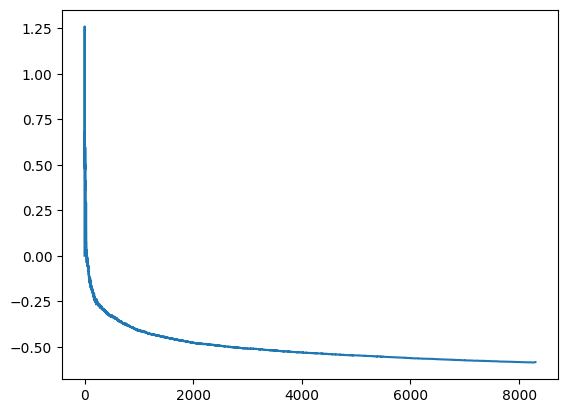

In [51]:
actions = [-5, -2, -1, 1, 2, 5]
env = LineWalkEnvironment(256, actions)
greedy_agent = Walker(actions, epsilon=0.0)

print(f"agent position: {env.agent_position}")
print(f"goal position: {env.goal}")

reward = [0]

while env.agent_position != env.goal:
    reward.append(greedy_agent.walk(env))
    
plt.plot(range(len(reward)), reward)

In [52]:
greedy_agent.expected_reward

[-0.5867227377810051,
 -0.5867232886751679,
 -0.5867174845936174,
 -0.586721147127541,
 -0.5867318259237844,
 -0.5846065330207524]